# Visualization for Final Paper

In [1]:
import seaborn as sns
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# set seaborn settings for neurips paper
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("colorblind")

flier_props = dict(markerfacecolor='0.75', markersize=2,
              linestyle='none')

## Alaa et al. synthethic data (Setup A and B)

In [3]:
csv_files_setupA = glob.glob("../../results/outputs/alaa/setupA/eval/*_normalized_max_min_y_eval.csv")
csv_files_setupB = glob.glob("../../results/outputs/alaa/setupB/eval/*_normalized_max_min_y_eval.csv")

data = []

for filepath in csv_files_setupA:
    df1 = pd.read_csv(filepath, header=0)
    df1['setup'] = 'A'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_A = pd.concat(data, axis=0, ignore_index=True)

data = []

for filepath in csv_files_setupB:
    df1 = pd.read_csv(filepath, header=0)
    df1['setup'] = 'B'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_B = pd.concat(data, axis=0, ignore_index=True)

In [4]:
df_A["Significance"] = np.round(1 - df_A["alpha"], 2)
df_B["Significance"] = np.round(1 - df_B["alpha"], 2)

df_A_wo_90 = df_A[df_A["Significance"] != 0.9]
df_B_wo_90 = df_B[df_B["Significance"] != 0.9]

df_A_90 = df_A[df_A["Significance"] == 0.9]
df_B_90 = df_B[df_B["Significance"] == 0.9]

In [5]:
df_results_90 =  pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_pseudo_MC_T_ite"], "Interval length": df_A_90["int_width_pseudo_MC_T"],
                                                        "RMSE": df_A_90["rmse_pseudo_MC_T_ite"],
                                                        "Method": "pCMC T-learner", "Setup": "A"})
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_MC_T_ite"], "Interval length": df_A_90["int_width_MC_T"],
                                                        "RMSE": df_A_90["rmse_MC_T_ite"],
                                                        "Method": "CMC T-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_CT_ite"], "Interval length": df_A_90["int_width_CT"], "RMSE": df_A_90["rmse_CT_ite"],
                                "Method": "CCT-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_CM_ite"], "Interval length": df_A_90["int_width_CM"], "RMSE": df_A_90["rmse_CM_ite"],
                                "Method": "CM DR-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_naive_ite"], "Interval length": df_A_90["int_width_naive_ite"],
                                                        "RMSE": df_A_90["rmse_naive_ite"],
                                                        "Method": "Naive WCP", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_exact_ite"], "Interval length": df_A_90["int_width_exact_ite"],
                                                        "RMSE": df_A_90["rmse_exact_ite"],
                                                        "Method": "Exact WCP", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_inexact_ite"], "Interval length": df_A_90["int_width_inexact_ite"],
                                                        "RMSE": df_A_90["rmse_inexact_ite"],
                                                        "Method": "Inexact WCP", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_ite_oracle"], "Interval length": df_A_90["int_width_ite_oracle"],
                                                        "RMSE": df_A_90["rmse_ite_oracle"],
                                                        "Method": "CPS Oracle", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_pseudo_MC_S_ite"], "Interval length": df_A_90["int_width_pseudo_MC_S"],
                                                        "RMSE": df_A_90["rmse_pseudo_MC_S_ite"],
                                                        "Method": "pCMC S-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_MC_S_ite"], "Interval length": df_A_90["int_width_MC_S"],
                                                        "RMSE": df_A_90["rmse_MC_S_ite"],
                                                        "Method": "CMC S-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_pseudo_MC_X_ite"], "Interval length": df_A_90["int_width_pseudo_MC_X"],
                                                        "RMSE": df_A_90["rmse_pseudo_MC_X_ite"],
                                                        "Method": "pCMC X-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_MC_X_ite"], "Interval length": df_A_90["int_width_MC_X"],
                                                        "RMSE": df_A_90["rmse_MC_X_ite"],
                                                        "Method": "CMC X-learner", "Setup": "A"})], ignore_index=True)


df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_pseudo_MC_T_ite"], "Interval length": df_B_90["int_width_pseudo_MC_T"],
                                                        "RMSE": df_B_90["rmse_pseudo_MC_T_ite"],
                                                        "Method": "pCMC T-learner", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_MC_T_ite"], "Interval length": df_B_90["int_width_MC_T"],
                                                        "RMSE": df_B_90["rmse_MC_T_ite"],
                                                        "Method": "CMC T-learner", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_CT_ite"], "Interval length": df_B_90["int_width_CT"], "RMSE": df_B_90["rmse_CT_ite"],
                                "Method": "CCT-learner", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_CM_ite"], "Interval length": df_B_90["int_width_CM"], "RMSE": df_B_90["rmse_CM_ite"],
                                "Method": "CM DR-learner", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_naive_ite"], "Interval length": df_B_90["int_width_naive_ite"],
                                                        "RMSE": df_B_90["rmse_naive_ite"],
                                                        "Method": "Naive WCP", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_exact_ite"], "Interval length": df_B_90["int_width_exact_ite"],
                                                        "RMSE": df_B_90["rmse_exact_ite"],
                                                        "Method": "Exact WCP", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_inexact_ite"], "Interval length": df_B_90["int_width_inexact_ite"],
                                                        "RMSE": df_B_90["rmse_inexact_ite"],
                                                        "Method": "Inexact WCP", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_ite_oracle"], "Interval length": df_B_90["int_width_ite_oracle"],
                                                        "RMSE": df_B_90["rmse_ite_oracle"],
                                                        "Method": "CPS Oracle", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_pseudo_MC_S_ite"], "Interval length": df_B_90["int_width_pseudo_MC_S"],
                                                        "RMSE": df_B_90["rmse_pseudo_MC_S_ite"],
                                                        "Method": "pCMC S-learner", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_MC_S_ite"], "Interval length": df_B_90["int_width_MC_S"],
                                                        "RMSE": df_B_90["rmse_MC_S_ite"],
                                                        "Method": "CMC S-learner", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_pseudo_MC_X_ite"], "Interval length": df_B_90["int_width_pseudo_MC_X"],
                                                        "RMSE": df_B_90["rmse_pseudo_MC_X_ite"],
                                                        "Method": "pCMC X-learner", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_MC_X_ite"], "Interval length": df_B_90["int_width_MC_X"],
                                                        "RMSE": df_B_90["rmse_MC_X_ite"],
                                                        "Method": "CMC X-learner", "Setup": "B"})], ignore_index=True)


# Include counterfactual outcomes in the evaluation
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_y0"], "Interval length": df_A_90["int_width_y0"],
                                                        "RMSE": df_A_90["rmse_y0"],
                                                        "Method": "y0", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_y1"], "Interval length": df_A_90["int_width_y1"],
                                                        "RMSE": df_A_90["rmse_y1"],
                                                        "Method": "y1", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_y0"], "Interval length": df_B_90["int_width_y0"],
                                                        "RMSE": df_B_90["rmse_y0"],
                                                        "Method": "y0", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_y1"], "Interval length": df_B_90["int_width_y1"],
                                                        "RMSE": df_B_90["rmse_y1"],
                                                        "Method": "y1", "Setup": "B"})], ignore_index=True)

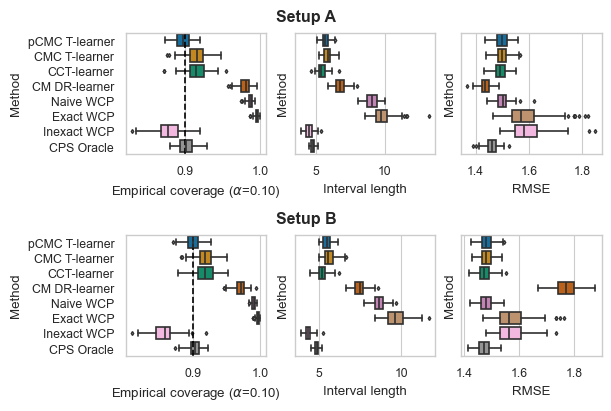

In [6]:
fig = plt.figure(constrained_layout=True, figsize=(6, 4))

methods = ["pCMC T-learner", "CMC T-learner",
        #    "pCMC X-learner", "CMC X-learner",
           "CCT-learner", "CM DR-learner",
           "Naive WCP", "Exact WCP", "Inexact WCP",
           "Oracle CPS", "CPS Oracle"]

df_vis = df_results_90[df_results_90["Method"].isin(methods)]

subfigs = fig.subfigures(nrows=2, ncols=1)
subfigs[0].suptitle('Setup A', fontweight='semibold')
axsA = subfigs[0].subplots(1, 3, sharey=True)
sns.boxplot(data=df_vis[df_vis["Setup"]=="A"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsA[0],
            hue="Method", dodge=False, flierprops=flier_props)
axsA[0].vlines(0.90, -0.5, 12, linestyle='--', color='black', label='Nominal coverage')
# Change the x-axis label
axsA[0].set_xlabel(r"Empirical coverage ($\alpha$=0.10)")
sns.boxplot(data=df_vis[df_vis["Setup"]=="A"], y="Method", x="Interval length", ax=axsA[1],
            hue="Method", dodge=False, flierprops=flier_props)
sns.boxplot(data=df_vis[df_vis["Setup"]=="A"], y="Method", x="RMSE", ax=axsA[2],
            hue="Method", dodge=False, flierprops=flier_props)
# remove legends
axsA[0].get_legend().remove()
axsA[1].get_legend().remove()
axsA[2].get_legend().remove()

subfigs[1].suptitle('Setup B', fontweight='semibold')
axsB = subfigs[1].subplots(1, 3, sharey=True)
sns.boxplot(data=df_vis[df_vis["Setup"]=="B"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsB[0],
            hue="Method", dodge=False, flierprops=flier_props)
axsB[0].vlines(0.90, -0.5, 12, linestyle='--', color='black', label='Nominal coverage')
axsB[0].set_xlabel(r"Empirical coverage ($\alpha$=0.10)")
sns.boxplot(data=df_vis[df_vis["Setup"]=="B"], y="Method", x="Interval length", ax=axsB[1],
            hue="Method", dodge=False, flierprops=flier_props)
sns.boxplot(data=df_vis[df_vis["Setup"]=="B"], y="Method", x="RMSE", ax=axsB[2],
            hue="Method", dodge=False, flierprops=flier_props)
# remove legends
axsB[0].get_legend().remove()
axsB[1].get_legend().remove()
axsB[2].get_legend().remove()

fig.savefig("../../results/figures/results_90_synthetic_alaa.pdf", bbox_inches='tight')
fig.savefig("../../results/figures/results_90_synthetic_alaa.png", bbox_inches='tight')
plt.show()

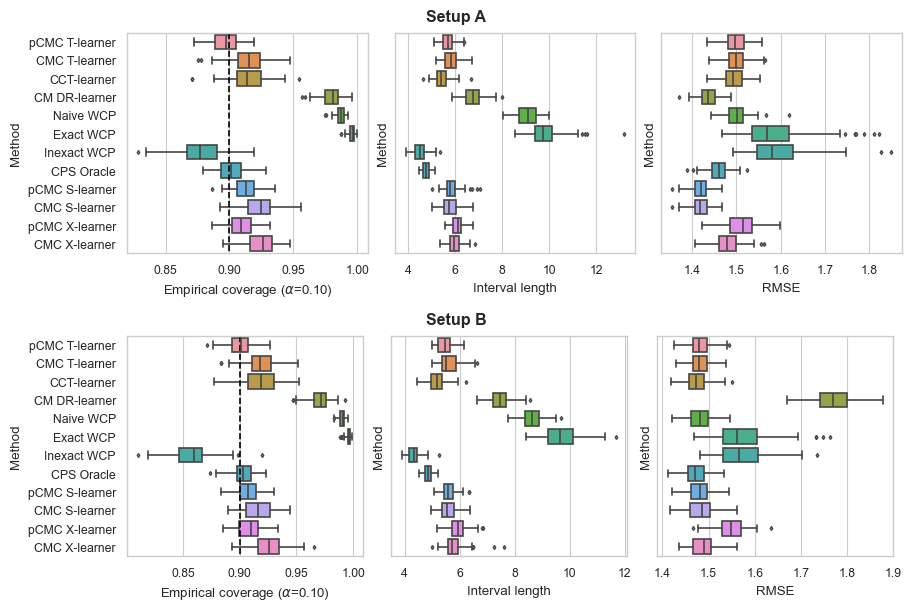

In [7]:
fig = plt.figure(constrained_layout=True, figsize=(9, 6))

methods = ["pCMC T-learner", "CMC T-learner",
           "pCMC S-learner", "CMC S-learner",
           "pCMC X-learner", "CMC X-learner",
           "CCT-learner", "CM DR-learner",
           "Naive WCP", "Exact WCP", "Inexact WCP",
           "Oracle CPS", "CPS Oracle"]

df_vis = df_results_90[df_results_90["Method"].isin(methods)]

subfigs = fig.subfigures(nrows=2, ncols=1)
subfigs[0].suptitle('Setup A', fontweight='semibold')
axsA = subfigs[0].subplots(1, 3, sharey=True)
sns.boxplot(data=df_vis[df_vis["Setup"]=="A"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsA[0],
            hue="Method", dodge=False, flierprops=flier_props)
axsA[0].vlines(0.90, -0.5, 12, linestyle='--', color='black', label='Nominal coverage')
# Change the x-axis label
axsA[0].set_xlabel(r"Empirical coverage ($\alpha$=0.10)")
sns.boxplot(data=df_vis[df_vis["Setup"]=="A"], y="Method", x="Interval length", ax=axsA[1],
            hue="Method", dodge=False, flierprops=flier_props)
sns.boxplot(data=df_vis[df_vis["Setup"]=="A"], y="Method", x="RMSE", ax=axsA[2],
            hue="Method", dodge=False, flierprops=flier_props)
# remove legends
axsA[0].get_legend().remove()
axsA[1].get_legend().remove()
axsA[2].get_legend().remove()

subfigs[1].suptitle('Setup B', fontweight='semibold')
axsB = subfigs[1].subplots(1, 3, sharey=True)
sns.boxplot(data=df_vis[df_vis["Setup"]=="B"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsB[0],
            hue="Method", dodge=False, flierprops=flier_props)
axsB[0].vlines(0.90, -0.5, 12, linestyle='--', color='black', label='Nominal coverage')
axsB[0].set_xlabel(r"Empirical coverage ($\alpha$=0.10)")
sns.boxplot(data=df_vis[df_vis["Setup"]=="B"], y="Method", x="Interval length", ax=axsB[1],
            hue="Method", dodge=False, flierprops=flier_props)
sns.boxplot(data=df_vis[df_vis["Setup"]=="B"], y="Method", x="RMSE", ax=axsB[2],
            hue="Method", dodge=False, flierprops=flier_props)
# remove legends
axsB[0].get_legend().remove()
axsB[1].get_legend().remove()
axsB[2].get_legend().remove()

fig.savefig("../../results/figures/results_90_synthetic_alaa_all.pdf", bbox_inches='tight')
fig.savefig("../../results/figures/results_90_synthetic_alaa_all.png", bbox_inches='tight')
plt.show()

#### PIT histograms

In [8]:
df_setupA_p_values = pd.read_csv("../../results/outputs/alaa/setupA/p_values/simulations_A_RF_normalized_max_min_y_p_values.csv")
df_setupA_unweighted_p_values = pd.read_csv("../../results/outputs/alaa/setupA/p_values/simulations_A_RF_normalized_max_min_y_unweighted_p_values.csv")
df_setupB_p_values = pd.read_csv("../../results/outputs/alaa/setupB/p_values/simulations_B_RF_normalized_max_min_y_p_values.csv")
df_setupB_unweighted_p_values = pd.read_csv("../../results/outputs/alaa/setupB/p_values/simulations_B_RF_normalized_max_min_y_unweighted_p_values.csv")

/opt/anaconda3/envs/uq/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/uq/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/uq/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/uq/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

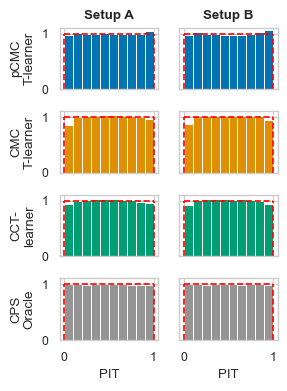

In [9]:
fig, axs = plt.subplots(4, 2, figsize=(3, 4), sharey=True, sharex=True)
bins = 10


sns.histplot(df_setupA_p_values["pseudo_MC_T"], ax = axs[0, 0], bins=bins,
                color=sns.color_palette(n_colors=8)[0], label="pCMC T-learner", stat="density", alpha=1)
sns.histplot(df_setupA_p_values["MC_T"], ax = axs[1, 0], bins=bins,
             color=sns.color_palette(n_colors=8)[1], label="CMC T-learner", stat="density", alpha=1)
sns.histplot(df_setupA_p_values["CT"], ax = axs[2, 0], bins=bins,
             color=sns.color_palette(n_colors=8)[2], label="CCT-learner", stat="density", alpha=1)
sns.histplot(df_setupA_p_values["oracle"], ax = axs[3, 0], bins=bins,
             color=sns.color_palette(n_colors=8)[7], label="Oracle", stat="density", alpha=1)


sns.histplot(df_setupB_p_values["pseudo_MC_T"], ax = axs[0, 1], bins=bins,
                color=sns.color_palette(n_colors=8)[0], label="pCMC T-learner", stat="density", alpha=1)
sns.histplot(df_setupB_p_values["MC_T"], ax = axs[1, 1], bins=bins,
                color=sns.color_palette(n_colors=8)[1], label="CMC T-learner", stat="density", alpha=1)
sns.histplot(df_setupB_p_values["CT"], ax = axs[2, 1], bins=bins,
                color=sns.color_palette(n_colors=8)[2], label="CCT-learner", stat="density", alpha=1)
sns.histplot(df_setupB_p_values["oracle"], ax = axs[3, 1], bins=bins,
                color=sns.color_palette(n_colors=8)[7], label="Oracle", stat="density", alpha=1)



for i in range(4):
    for j in range(2):
        # remove legend
        axs[i, j].set_xlabel("PIT")
        axs[i, j].hlines(1, 0, 1, color='r', linestyle='--')
        axs[i, j].vlines(0, 0, 1, color='r', linestyle='--')
        axs[i, j].vlines(1, 0, 1, color='r', linestyle='--')

fig.tight_layout()

axs[0, 0].set_title("Setup A", fontweight='semibold')
axs[0, 1].set_title("Setup B", fontweight='semibold')

axs[0, 0].set_ylabel("pCMC\nT-learner")
axs[1, 0].set_ylabel("CMC\nT-learner")
axs[2, 0].set_ylabel("CCT-\nlearner")
axs[3, 0].set_ylabel("CPS\nOracle")

plt.tight_layout()
fig.savefig("../../results/figures/alaa_pit_setupA_B.pdf", bbox_inches='tight')
fig.savefig("../../results/figures/alaa_pit_setupA_B.png", bbox_inches='tight')
plt.show()

## Semi-synthetic data

### ACIC 2016

In [10]:
csv_files_setup_acic2016 = glob.glob("../../results/outputs/acic2016/eval/*_normalized_eval.csv")

data = []

for filepath in csv_files_setup_acic2016:
    df1 = pd.read_csv(filepath, header=0)
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_acic2016 = pd.concat(data, axis=0, ignore_index=True)

In [11]:
df_semi_synth =  pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_pseudo_MC_T_ite"], "Interval length": df_acic2016["int_width_pseudo_MC_T"],
                                                        "RMSE": df_acic2016["rmse_pseudo_MC_T_ite"],
                                                        "Method": "pCMC T-learner", "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})
df_semi_synth = pd.concat([df_semi_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_MC_T_ite"], "Interval length": df_acic2016["int_width_MC_T"],
                                                        "RMSE": df_acic2016["rmse_MC_T_ite"],
                                                        "Method": "CMC T-learner",  "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})], ignore_index=True)
df_semi_synth = pd.concat([df_semi_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_pseudo_MC_S_ite"], "Interval length": df_acic2016["int_width_pseudo_MC_S"],
                                                        "RMSE": df_acic2016["rmse_pseudo_MC_S_ite"],
                                                        "Method": "pCMC S-learner",  "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})], ignore_index=True)
df_semi_synth = pd.concat([df_semi_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_MC_S_ite"], "Interval length": df_acic2016["int_width_MC_S"],
                                                        "RMSE": df_acic2016["rmse_MC_S_ite"],
                                                        "Method": "CMC S-learner",  "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})], ignore_index=True)
df_semi_synth = pd.concat([df_semi_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_pseudo_MC_X_ite"], "Interval length": df_acic2016["int_width_pseudo_MC_X"],
                                                        "RMSE": df_acic2016["rmse_pseudo_MC_X_ite"],
                                                        "Method": "pCMC X-learner",  "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})], ignore_index=True)
df_semi_synth = pd.concat([df_semi_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_MC_X_ite"], "Interval length": df_acic2016["int_width_MC_X"],
                                                        "RMSE": df_acic2016["rmse_MC_X_ite"],
                                                        "Method": "CMC X-learner",  "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})], ignore_index=True)
df_semi_synth = pd.concat([df_semi_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_CT_ite"], "Interval length": df_acic2016["int_width_CT"], "RMSE": df_acic2016["rmse_CT_ite"],
                                "Method": "CCT-learner",  "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})], ignore_index=True)
df_semi_synth = pd.concat([df_semi_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_CM_ite"], "Interval length": df_acic2016["int_width_CM"], "RMSE": df_acic2016["rmse_CM_ite"],
                                "Method": "CM DR-learner",  "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})], ignore_index=True)
df_semi_synth = pd.concat([df_semi_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_naive_ite"], "Interval length": df_acic2016["int_width_naive_ite"],
                                                        "RMSE": df_acic2016["rmse_naive_ite"],
                                                        "Method": "Naive WCP",  "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})], ignore_index=True)
df_semi_synth = pd.concat([df_semi_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_exact_ite"], "Interval length": df_acic2016["int_width_exact_ite"],
                                                        "RMSE": df_acic2016["rmse_exact_ite"],
                                                        "Method": "Exact WCP",  "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})], ignore_index=True)
df_semi_synth = pd.concat([df_semi_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_inexact_ite"], "Interval length": df_acic2016["int_width_inexact_ite"],
                                                        "RMSE": df_acic2016["rmse_inexact_ite"],
                                                        "Method": "Inexact WCP",  "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})], ignore_index=True)
df_semi_synth = pd.concat([df_semi_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_ite_oracle"], "Interval length": df_acic2016["int_width_ite_oracle"],
                                                        "RMSE": df_acic2016["rmse_ite_oracle"],
                                                        "Method": "CPS Oracle",  "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})], ignore_index=True)


df_semi_synth = pd.concat([df_semi_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_y0"], "Interval length": df_acic2016["int_width_y0"], "RMSE": df_acic2016["rmse_y0"],
                                "Method": "y0 CTT",  "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})], ignore_index=True)
df_semi_synth = pd.concat([df_semi_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_y1"], "Interval length": df_acic2016["int_width_y1"], "RMSE": df_acic2016["rmse_y1"],
                                "Method": "y1 CTT",  "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})], ignore_index=True)
df_semi_synth = pd.concat([df_semi_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_y0_oracle"], "Interval length": df_acic2016["int_width_y0_oracle"], "RMSE": df_acic2016["rmse_y0_oracle"],
                                "Method": "y0 Oracle",  "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})], ignore_index=True)
df_semi_synth = pd.concat([df_semi_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_y1_oracle"], "Interval length": df_acic2016["int_width_y1_oracle"], "RMSE": df_acic2016["rmse_y1_oracle"],
                                "Method": "y1 Oracle",  "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})], ignore_index=True)
df_semi_synth = pd.concat([df_semi_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_ite_oracle"], "Interval length": df_acic2016["int_width_ite_oracle"], "RMSE": df_acic2016["rmse_ite_oracle"],
                                "Method": "ITE Oracle",  "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})], ignore_index=True)
df_semi_synth = pd.concat([df_semi_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_y_cond0"], "Interval length": df_acic2016["int_width_y_cond0"], "RMSE": df_acic2016["rmse_y_cond0"],
                                "Method": "y | W = 0",  "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})], ignore_index=True)
df_semi_synth = pd.concat([df_semi_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_acic2016["coverage_y_cond1"], "Interval length": df_acic2016["int_width_y_cond1"], "RMSE": df_acic2016["rmse_y_cond1"],
                                "Method": "y | W = 1",  "Setting": df_acic2016["setting"], "sim_number": df_acic2016["sim_number"]})], ignore_index=True)

/opt/anaconda3/envs/uq/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/uq/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/uq/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/uq/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

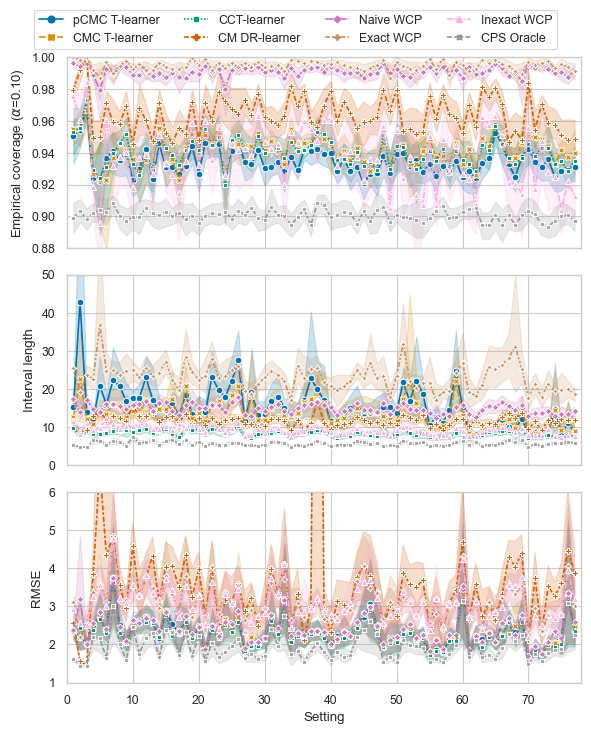

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(6, 7), sharey=False, sharex=True)

methods = ["pCMC T-learner", "CMC T-learner",
           "CCT-learner", "CM DR-learner",
           "Naive WCP", "Exact WCP", "Inexact WCP",
           "Oracle CPS", "CPS Oracle"]

errorbar = ("ci", 95)
df_vis = df_semi_synth[df_semi_synth["Method"].isin(methods)]
sns.lineplot(df_vis, x="Setting", y="Empirical coverage (⍺=0.90)", hue="Method", style="Method",
             markers=True, dashes=True, ax=axs[0], errorbar=errorbar)
sns.lineplot(df_vis, x="Setting", y="Interval length", hue="Method", style="Method",
                markers=True, dashes=True, ax=axs[1], errorbar=errorbar)
sns.lineplot(df_vis, x="Setting", y="RMSE", hue="Method", style="Method",
                markers=True, dashes=True, ax=axs[2], errorbar=errorbar)
axs[0].set_ylabel(r"Empirical coverage ($\alpha$=0.10)")
axs[1].set_ylabel("Interval length")
axs[2].set_ylabel("RMSE")

axs[0].set_ylim(0.88, 1)
axs[1].set_ylim(0, 50)
axs[2].set_ylim(1, 6)
axs[0].set_xlim(0,78)
# set only one legend and remove the others
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05))
axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].get_legend().remove()




plt.tight_layout()
fig.savefig("../../results/figures/results_acic2016.pdf", bbox_inches='tight')
fig.savefig("../../results/figures/results_acic2016.png", bbox_inches='tight')
plt.show()

### IHDP and NLSM

In [13]:
csv_files_setup_nlsm = glob.glob("../../results/outputs/ihdp/eval/*_nonnormalized_max_min_y_eval.csv")
csv_files_setup_ihdp = glob.glob("../../results/outputs/nlsm/eval/*_nonnormalized_max_min_y_eval.csv")

data = []

for filepath in csv_files_setup_nlsm:
    df1 = pd.read_csv(filepath, header=0)
    df1['Setup'] = 'IHDP'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_IHDP = pd.concat(data, axis=0, ignore_index=True)

data = []

for filepath in csv_files_setup_ihdp:
    df1 = pd.read_csv(filepath, header=0)
    df1['Setup'] = 'NLSM'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_NLSM = pd.concat(data, axis=0, ignore_index=True)

In [14]:

df_sim_synth =  pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_pseudo_MC_T_ite"], "Interval length": df_IHDP["int_width_pseudo_MC_T"],
                                                        "RMSE": df_IHDP["rmse_pseudo_MC_T_ite"],
                                                        "Method": "pCMC T-learner", "Setup": "IHDP"})
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_MC_T_ite"], "Interval length": df_IHDP["int_width_MC_T"],
                                                        "RMSE": df_IHDP["rmse_MC_T_ite"],
                                                        "Method": "CMC T-learner", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_CT_ite"], "Interval length": df_IHDP["int_width_CT"], "RMSE": df_IHDP["rmse_CT_ite"],
                                "Method": "CCT-learner", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_CM_ite"], "Interval length": df_IHDP["int_width_CM"], "RMSE": df_IHDP["rmse_CM_ite"],
                                "Method": "CM DR-learner", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_naive_ite"], "Interval length": df_IHDP["int_width_naive_ite"],
                                                        "RMSE": df_IHDP["rmse_naive_ite"],
                                                        "Method": "Naive WCP", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_exact_ite"], "Interval length": df_IHDP["int_width_exact_ite"],
                                                        "RMSE": df_IHDP["rmse_exact_ite"],
                                                        "Method": "Exact WCP", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_inexact_ite"], "Interval length": df_IHDP["int_width_inexact_ite"],
                                                        "RMSE": df_IHDP["rmse_inexact_ite"],
                                                        "Method": "Inexact WCP", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_ite_oracle"], "Interval length": df_IHDP["int_width_ite_oracle"],
                                                        "RMSE": df_IHDP["rmse_ite_oracle"],
                                                        "Method": "CPS Oracle", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_pseudo_MC_S_ite"], "Interval length": df_IHDP["int_width_pseudo_MC_S"],
                                                        "RMSE": df_IHDP["rmse_pseudo_MC_S_ite"],
                                                        "Method": "pCMC S-learner", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_MC_S_ite"], "Interval length": df_IHDP["int_width_MC_S"],
                                                        "RMSE": df_IHDP["rmse_MC_S_ite"],
                                                        "Method": "CMC S-learner", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_pseudo_MC_X_ite"], "Interval length": df_IHDP["int_width_pseudo_MC_X"],
                                                        "RMSE": df_IHDP["rmse_pseudo_MC_X_ite"],
                                                        "Method": "pCMC X-learner", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_MC_X_ite"], "Interval length": df_IHDP["int_width_MC_X"],
                                                        "RMSE": df_IHDP["rmse_MC_X_ite"],
                                                        "Method": "CMC X-learner", "Setup": "IHDP"})], ignore_index=True)


df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_pseudo_MC_T_ite"], "Interval length": df_NLSM["int_width_pseudo_MC_T"],
                                                        "RMSE": df_NLSM["rmse_pseudo_MC_T_ite"],
                                                        "Method": "pCMC T-learner", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_MC_T_ite"], "Interval length": df_NLSM["int_width_MC_T"],
                                                        "RMSE": df_NLSM["rmse_MC_T_ite"],
                                                        "Method": "CMC T-learner", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_CT_ite"], "Interval length": df_NLSM["int_width_CT"], "RMSE": df_NLSM["rmse_CT_ite"],
                                "Method": "CCT-learner", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_CM_ite"], "Interval length": df_NLSM["int_width_CM"], "RMSE": df_NLSM["rmse_CM_ite"],
                                "Method": "CM DR-learner", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_naive_ite"], "Interval length": df_NLSM["int_width_naive_ite"],
                                                        "RMSE": df_NLSM["rmse_naive_ite"],
                                                        "Method": "Naive WCP", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_exact_ite"], "Interval length": df_NLSM["int_width_exact_ite"],
                                                        "RMSE": df_NLSM["rmse_exact_ite"],
                                                        "Method": "Exact WCP", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_inexact_ite"], "Interval length": df_NLSM["int_width_inexact_ite"],
                                                        "RMSE": df_NLSM["rmse_inexact_ite"],
                                                        "Method": "Inexact WCP", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_ite_oracle"], "Interval length": df_NLSM["int_width_ite_oracle"],
                                                        "RMSE": df_NLSM["rmse_ite_oracle"],
                                                        "Method": "CPS Oracle", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_pseudo_MC_S_ite"], "Interval length": df_NLSM["int_width_pseudo_MC_S"],
                                                        "RMSE": df_NLSM["rmse_pseudo_MC_S_ite"],
                                                        "Method": "pCMC S-learner", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_MC_S_ite"], "Interval length": df_NLSM["int_width_MC_S"],
                                                        "RMSE": df_NLSM["rmse_MC_S_ite"],
                                                        "Method": "CMC S-learner", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_pseudo_MC_X_ite"], "Interval length": df_NLSM["int_width_pseudo_MC_X"],
                                                        "RMSE": df_NLSM["rmse_pseudo_MC_X_ite"],
                                                        "Method": "pCMC X-learner", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_MC_X_ite"], "Interval length": df_NLSM["int_width_MC_X"],
                                                        "RMSE": df_NLSM["rmse_MC_X_ite"],
                                                        "Method": "CMC X-learner", "Setup": "NLSM"})], ignore_index=True)



# Include counterfactual outcomes in the evaluation
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_y0"], "Interval length": df_IHDP["int_width_y0"], "RMSE": df_IHDP["rmse_y0"],
                                "Method": "y0 CTT", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_y1"], "Interval length": df_IHDP["int_width_y1"], "RMSE": df_IHDP["rmse_y1"],
                                "Method": "y1 CTT", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_y0_oracle"], "Interval length": df_IHDP["int_width_y0_oracle"], "RMSE": df_IHDP["rmse_y0_oracle"],
                                "Method": "y0 Oracle", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_y1_oracle"], "Interval length": df_IHDP["int_width_y1_oracle"], "RMSE": df_IHDP["rmse_y1_oracle"],
                                "Method": "y1 Oracle", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_ite_oracle"], "Interval length": df_IHDP["int_width_ite_oracle"], "RMSE": df_IHDP["rmse_ite_oracle"],
                                "Method": "ITE Oracle", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_y_cond0"], "Interval length": df_IHDP["int_width_y_cond0"], "RMSE": df_IHDP["rmse_y_cond0"],
                                "Method": "y | W = 0", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_y_cond1"], "Interval length": df_IHDP["int_width_y_cond1"], "RMSE": df_IHDP["rmse_y_cond1"],
                                "Method": "y | W = 1", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_y0"], "Interval length": df_NLSM["int_width_y0"], "RMSE": df_NLSM["rmse_y0"],
                                "Method": "y0 CTT", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_y1"], "Interval length": df_NLSM["int_width_y1"], "RMSE": df_NLSM["rmse_y1"],
                                "Method": "y1 CTT", "Setup": "NLSM"})], ignore_index=True)

In [15]:
# 50th Percentile
def q5(x):
    return x.quantile(0.05)
# 90th Percentile
def q95(x):
    return x.quantile(0.95)

df_sim_synth[df_sim_synth["Setup"] == "IHDP"].groupby(["Method"]).agg({"Empirical coverage (⍺=0.90)": ["mean", "std"],
                                    "Interval length": ["mean", "std"],
                                    "RMSE": ["mean", "std"]}).round(2)

Empirical coverage (⍺=0.90)       Interval length         \
                                      mean   std            mean    std   
Method                                                                    
CCT-learner                           0.92  0.06             inf    NaN   
CM DR-learner                         0.97  0.05           17.09  16.67   
CMC S-learner                         0.98  0.04           20.34  18.40   
CMC T-learner                         0.95  0.05           19.83  17.70   
CMC X-learner                         0.96  0.04           20.40  18.62   
CPS Oracle                            0.91  0.04            5.27   0.27   
Exact WCP                             0.99  0.01           29.67  37.10   
ITE Oracle                            0.91  0.04            5.27   0.27   
Inexact WCP                           0.58  0.20            7.31   5.37   
Naive WCP                             0.95  0.07             inf    NaN   
pCMC S-learner                        0.97  0.04           22.05  20.21   
pCMC T-learner                        0.94  0.05           20.74  17.41   
pCMC X-learner                        0.95  0.04           22.98  20.23   
y | W = 0                             0.91  0.04           10.44  13.01   
y | W = 1                             0.92  0.08            4.15   0.44   
y0 CTT                                0.41  0.37           10.16  13.32   
y0 Oracle                             0.91  0.04            3.92   0.26   
y1 CTT                                0.84  0.18             inf    NaN   
y1 Oracle                             0.91  0.04            3.60   0.18   

                 RMSE         
                 mean    std  
Method                        
CCT-learner      5.36   6.04  
CM DR-learner    3.47   2.40  
CMC S-learner    4.53   4.32  
CMC T-learner    5.27   5.80  
CMC X-learner    4.78   5.41  
CPS Oracle       1.57   0.14  
Exact WCP        4.85   5.02  
ITE Oracle       1.57   0.14  
Inexact WCP      4.75   4.45  
Naive WCP        5.26   5.75  
pCMC S-learner   4.53   4.24  
pCMC T-learner   5.35   6.04  
pCMC X-learner   5.55   6.50  
y | W = 0        3.44   4.88  
y | W = 1        1.10   0.21  
y0 CTT          10.08  14.13  
y0 Oracle        1.16   0.13  
y1 CTT          11.63  14.59  
y1 Oracle        1.06   0.09

In [16]:
df_sim_synth[df_sim_synth["Setup"] == "NLSM"].groupby(["Method"]).agg({"Empirical coverage (⍺=0.90)": ["mean", "std"],
                                    "Interval length": ["mean", "std"],
                                    "RMSE": ["mean", "std"]}).round(4)

Empirical coverage (⍺=0.90)         Interval length          \
                                      mean     std            mean     std   
Method                                                                       
CCT-learner                         0.9994  0.0006          2.6636  0.0389   
CM DR-learner                       1.0000  0.0001          3.5546  0.0779   
CMC S-learner                       0.9993  0.0008          2.6643  0.0456   
CMC T-learner                       0.9991  0.0010          2.6720  0.0410   
CMC X-learner                       0.9992  0.0008          2.7041  0.0444   
CPS Oracle                          0.8623  0.0267          0.0000  0.0000   
Exact WCP                           1.0000  0.0000          4.7001  0.1118   
Inexact WCP                         1.0000  0.0002          2.1967  0.0337   
Naive WCP                           1.0000  0.0000          4.4913  0.0632   
pCMC S-learner                      0.9993  0.0009          2.6810  0.0308   
pCMC T-learner                      0.9992  0.0009          2.6720  0.0305   
pCMC X-learner                      0.9970  0.0014          2.7957  0.0339   
y0 CTT                              0.8938  0.0085          1.8971  0.0364   
y1 CTT                              0.9351  0.0113          1.8996  0.0605   

                  RMSE          
                  mean     std  
Method                          
CCT-learner     0.3747  0.0081  
CM DR-learner   0.1517  0.0130  
CMC S-learner   0.3707  0.0114  
CMC T-learner   0.3852  0.0104  
CMC X-learner   0.3849  0.0098  
CPS Oracle      0.0001  0.0001  
Exact WCP       0.3962  0.0242  
Inexact WCP     0.3898  0.0240  
Naive WCP       0.3854  0.0118  
pCMC S-learner  0.3696  0.0104  
pCMC T-learner  0.3836  0.0103  
pCMC X-learner  0.4390  0.0094  
y0 CTT          0.5772  0.0036  
y1 CTT          0.5196  0.0075

/opt/anaconda3/envs/uq/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/anaconda3/envs/uq/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


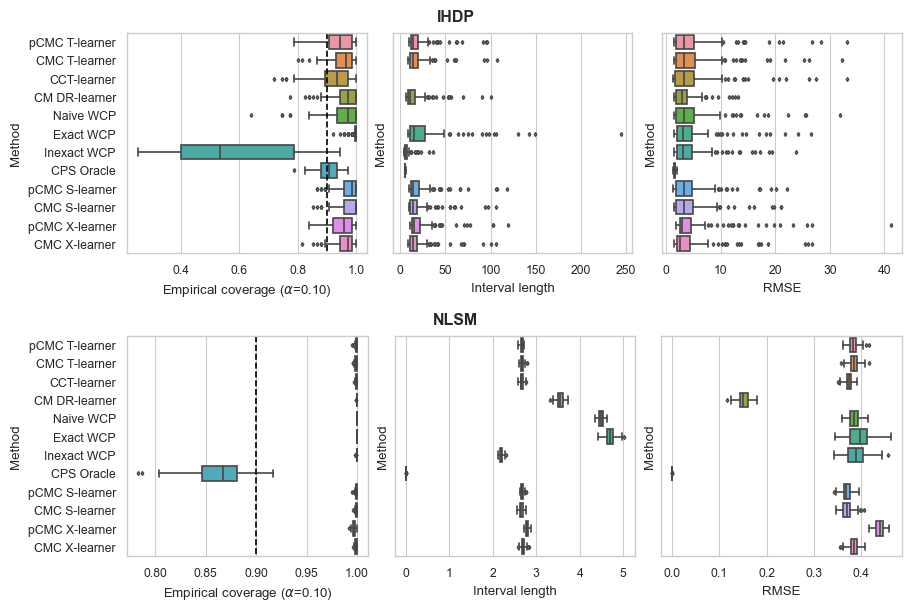

In [17]:
fig = plt.figure(constrained_layout=True, figsize=(9, 6))
methods = ["pCMC T-learner", "CMC T-learner",
           "pCMC S-learner", "CMC S-learner",
           "pCMC X-learner", "CMC X-learner",
           "CCT-learner", "CM DR-learner",
           "Naive WCP", "Exact WCP", "Inexact WCP",
           "Oracle CPS", "CPS Oracle"]


df_vis = df_sim_synth[df_sim_synth["Method"].isin(methods)]

subfigs = fig.subfigures(nrows=2, ncols=1)
subfigs[0].suptitle('IHDP', fontweight='semibold')
axsA = subfigs[0].subplots(1, 3, sharey=True)
sns.boxplot(data=df_vis[df_vis["Setup"]=="IHDP"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsA[0],
            hue="Method", dodge=False, flierprops=flier_props)
axsA[0].vlines(0.90, -0.5, 12, linestyle='--', color='black', label='Nominal coverage')
axsA[0].set_xlabel(r"Empirical coverage ($\alpha$=0.10)")
sns.boxplot(data=df_vis[df_vis["Setup"]=="IHDP"], y="Method", x="Interval length", ax=axsA[1],
            hue="Method", dodge=False, flierprops=flier_props)
sns.boxplot(data=df_vis[df_vis["Setup"]=="IHDP"], y="Method", x="RMSE", ax=axsA[2],
            hue="Method", dodge=False, flierprops=flier_props)
# remove legends
axsA[0].get_legend().remove()
axsA[1].get_legend().remove()
axsA[2].get_legend().remove()


subfigs[1].suptitle('NLSM', fontweight='semibold')
axsB = subfigs[1].subplots(1, 3, sharey=True)
sns.boxplot(data=df_vis[df_vis["Setup"]=="NLSM"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsB[0],
            hue="Method", dodge=False, flierprops=flier_props)
axsB[0].vlines(0.90, -0.5, 12, linestyle='--', color='black', label='Nominal coverage')
axsB[0].set_xlabel(r"Empirical coverage ($\alpha$=0.10)")
sns.boxplot(data=df_vis[df_vis["Setup"]=="NLSM"], y="Method", x="Interval length", ax=axsB[1],
            hue="Method", dodge=False, flierprops=flier_props)
sns.boxplot(data=df_vis[df_vis["Setup"]=="NLSM"], y="Method", x="RMSE", ax=axsB[2],
            hue="Method", dodge=False, flierprops=flier_props)
# remove legends
axsB[0].get_legend().remove()
axsB[1].get_legend().remove()
axsB[2].get_legend().remove()

fig.savefig("../../results/figures/results_90_ihdp_nlsm.pdf", bbox_inches='tight')
fig.savefig("../../results/figures/results_90_ihdp_nlsm.png", bbox_inches='tight')
plt.show()

## Nie and Wager (2021) synthethic data (Setup A, B, C, D)

### RF normalized

In [18]:
csv_files_setupA = glob.glob("../../results/outputs/nie_wager/setupA/eval/*RF_normalized_max_min_y_eval.csv")
csv_files_setupB = glob.glob("../../results/outputs/nie_wager/setupB/eval/*RF_normalized_max_min_y_eval.csv")
csv_files_setupC = glob.glob("../../results/outputs/nie_wager/setupC/eval/*RF_normalized_max_min_y_eval.csv")
csv_files_setupD = glob.glob("../../results/outputs/nie_wager/setupD/eval/*RF_normalized_max_min_y_eval.csv")

data = []

for filepath in csv_files_setupA:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['setup'] = 'A'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_A = pd.concat(data, axis=0, ignore_index=True)

data = []

for filepath in csv_files_setupB:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['setup'] = 'B'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_B = pd.concat(data, axis=0, ignore_index=True)

data = []

for filepath in csv_files_setupC:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['setup'] = 'C'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_C = pd.concat(data, axis=0, ignore_index=True)

data = []

for filepath in csv_files_setupD:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['setup'] = 'D'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_D = pd.concat(data, axis=0, ignore_index=True)


In [19]:
df_A["Significance"] = np.round(1 - df_A["alpha"], 2)
df_B["Significance"] = np.round(1 - df_B["alpha"], 2)
df_C["Significance"] = np.round(1 - df_C["alpha"], 2)
df_D["Significance"] = np.round(1 - df_D["alpha"], 2)

df_A_wo_90 = df_A[df_A["Significance"] != 0.9]
df_B_wo_90 = df_B[df_B["Significance"] != 0.9]
df_C_wo_90 = df_C[df_C["Significance"] != 0.9]
df_D_wo_90 = df_D[df_D["Significance"] != 0.9]

df_A_90 = df_A[df_A["Significance"] == 0.9]
df_B_90 = df_B[df_B["Significance"] == 0.9]
df_C_90 = df_C[df_C["Significance"] == 0.9]
df_D_90 = df_D[df_D["Significance"] == 0.9]

In [20]:

df_results_90 =  pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_pseudo_MC_T_ite"], "Interval length": df_A_90["int_width_pseudo_MC_T"],
                                                        "RMSE": df_A_90["rmse_pseudo_MC_T_ite"],
                                                        "Method": "pCMC T-learner", "Setup": "A"})
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_MC_T_ite"], "Interval length": df_A_90["int_width_MC_T"],
                                                        "RMSE": df_A_90["rmse_MC_T_ite"],
                                                        "Method": "CMC T-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_CT_ite"], "Interval length": df_A_90["int_width_CT"],
                                                        "RMSE": df_A_90["rmse_CT_ite"],
                                                        "Method": "CCT-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_CM_ite"], "Interval length": df_A_90["int_width_CM"], "RMSE": df_A_90["rmse_CM_ite"],
                                "Method": "CM DR-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_naive_ite"], "Interval length": df_A_90["int_width_naive_ite"],
                                                        "RMSE": df_A_90["rmse_naive_ite"],
                                                        "Method": "Naive WCP", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_exact_ite"], "Interval length": df_A_90["int_width_exact_ite"],
                                                        "RMSE": df_A_90["rmse_exact_ite"],
                                                        "Method": "Exact WCP", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_inexact_ite"], "Interval length": df_A_90["int_width_inexact_ite"],
                                                        "RMSE": df_A_90["rmse_inexact_ite"],
                                                        "Method": "Inexact WCP", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_ite_oracle"], "Interval length": df_A_90["int_width_ite_oracle"],
                                                        "RMSE": df_A_90["rmse_ite_oracle"],
                                                        "Method": "CPS Oracle", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_pseudo_MC_S_ite"], "Interval length": df_A_90["int_width_pseudo_MC_S"],
                                                        "RMSE": df_A_90["rmse_pseudo_MC_S_ite"],
                                                        "Method": "pCMC S-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_MC_S_ite"], "Interval length": df_A_90["int_width_MC_S"],
                                                        "RMSE": df_A_90["rmse_MC_S_ite"],
                                                        "Method": "CMC S-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_pseudo_MC_X_ite"], "Interval length": df_A_90["int_width_pseudo_MC_X"],
                                                        "RMSE": df_A_90["rmse_pseudo_MC_X_ite"],
                                                        "Method": "pCMC X-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_MC_X_ite"], "Interval length": df_A_90["int_width_MC_X"],
                                                        "RMSE": df_A_90["rmse_MC_X_ite"],
                                                        "Method": "CMC X-learner", "Setup": "A"})], ignore_index=True)

setup_names = ["B", "C", "D"]
for i, df in enumerate([df_B_90, df_C_90, df_D_90]):
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_pseudo_MC_T_ite"], "Interval length": df["int_width_pseudo_MC_T"],
                                                            "RMSE": df["rmse_pseudo_MC_T_ite"],
                                                            "Method": "pCMC T-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_MC_T_ite"], "Interval length": df["int_width_MC_T"],
                                                            "RMSE": df["rmse_MC_T_ite"],
                                                            "Method": "CMC T-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_CT_ite"], "Interval length": df["int_width_CT"],
                                                            "RMSE": df["rmse_CT_ite"],
                                                            "Method": "CCT-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_CM_ite"], "Interval length": df["int_width_CM"], "RMSE": df["rmse_CM_ite"],
                                    "Method": "CM DR-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_naive_ite"], "Interval length": df["int_width_naive_ite"],
                                                            "RMSE": df["rmse_naive_ite"],
                                                            "Method": "Naive WCP", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_exact_ite"], "Interval length": df["int_width_exact_ite"],
                                                            "RMSE": df["rmse_exact_ite"],
                                                            "Method": "Exact WCP", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_inexact_ite"], "Interval length": df["int_width_inexact_ite"],
                                                            "RMSE": df["rmse_inexact_ite"],
                                                            "Method": "Inexact WCP", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_ite_oracle"], "Interval length": df["int_width_ite_oracle"],
                                                            "RMSE": df["rmse_ite_oracle"],
                                                            "Method": "CPS Oracle", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_pseudo_MC_S_ite"], "Interval length": df["int_width_pseudo_MC_S"],
                                                            "RMSE": df["rmse_pseudo_MC_S_ite"],
                                                            "Method": "pCMC S-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_MC_S_ite"], "Interval length": df["int_width_MC_S"],
                                                            "RMSE": df["rmse_MC_S_ite"],
                                                            "Method": "CMC S-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_pseudo_MC_X_ite"], "Interval length": df["int_width_pseudo_MC_X"],
                                                            "RMSE": df["rmse_pseudo_MC_X_ite"],
                                                            "Method": "pCMC X-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_MC_X_ite"], "Interval length": df["int_width_MC_X"],
                                                            "RMSE": df["rmse_MC_X_ite"],
                                                            "Method": "CMC X-learner", "Setup": setup_names[i]})], ignore_index=True)

/opt/anaconda3/envs/uq/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/anaconda3/envs/uq/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/anaconda3/envs/uq/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


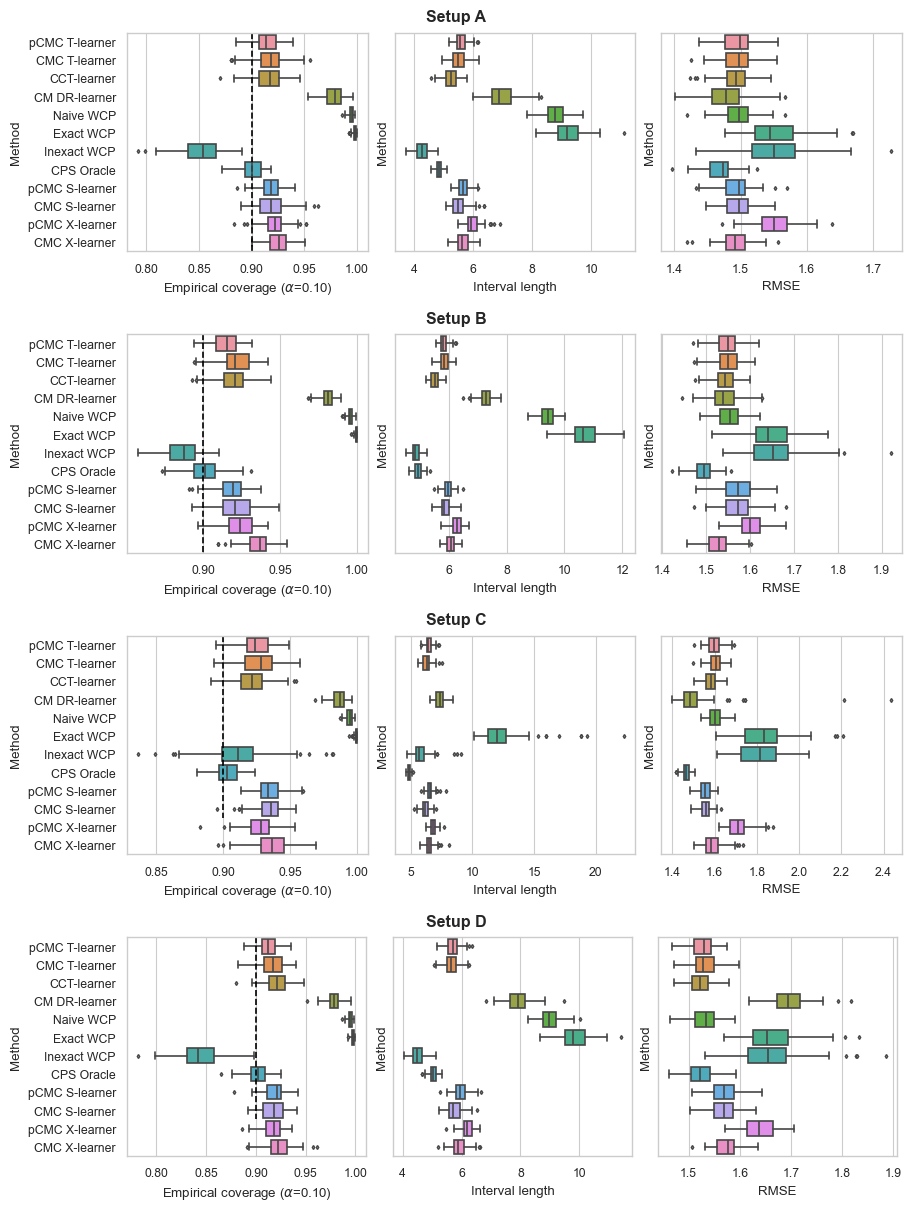

In [21]:
fig = plt.figure(constrained_layout=True, figsize=(9, 12))

subfigs = fig.subfigures(nrows=4, ncols=1)
subfigs[0].suptitle('Setup A', fontweight='semibold')
axsA = subfigs[0].subplots(1, 3, sharey=True)
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="A"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsA[0],
            hue="Method", dodge=False, flierprops=flier_props)
axsA[0].vlines(0.90, -0.5, 12, linestyle='--', color='black', label='Nominal coverage')
axsA[0].set_xlabel(r"Empirical coverage ($\alpha$=0.10)")
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="A"], y="Method", x="Interval length", ax=axsA[1],
            hue="Method", dodge=False, flierprops=flier_props)
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="A"], y="Method", x="RMSE", ax=axsA[2],
            hue="Method", dodge=False, flierprops=flier_props)

subfigs[1].suptitle('Setup B', fontweight='semibold')
axsB = subfigs[1].subplots(1, 3, sharey=True)
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="B"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsB[0],
            hue="Method", dodge=False, flierprops=flier_props)
axsB[0].vlines(0.90, -0.5, 12, linestyle='--', color='black', label='Nominal coverage')
axsB[0].set_xlabel(r"Empirical coverage ($\alpha$=0.10)")
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="B"], y="Method", x="Interval length", ax=axsB[1],
            hue="Method", dodge=False, flierprops=flier_props)
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="B"], y="Method", x="RMSE", ax=axsB[2],
            hue="Method", dodge=False, flierprops=flier_props)

subfigs[2].suptitle('Setup C', fontweight='semibold')
axsC = subfigs[2].subplots(1, 3, sharey=True)
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="C"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsC[0],
            hue="Method", dodge=False, flierprops=flier_props)
axsC[0].vlines(0.90, -0.5, 9.5, linestyle='--', color='black', label='Nominal coverage')
axsC[0].set_xlabel(r"Empirical coverage ($\alpha$=0.10)")
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="C"], y="Method", x="Interval length", ax=axsC[1],
            hue="Method", dodge=False, flierprops=flier_props)
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="C"], y="Method", x="RMSE", ax=axsC[2],
            hue="Method", dodge=False, flierprops=flier_props)

subfigs[3].suptitle('Setup D', fontweight='semibold')
axsD = subfigs[3].subplots(1, 3, sharey=True)
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="D"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsD[0],
            hue="Method", dodge=False, flierprops=flier_props)
axsD[0].vlines(0.90, -0.5, 9.5, linestyle='--', color='black', label='Nominal coverage')
axsD[0].set_xlabel(r"Empirical coverage ($\alpha$=0.10)")
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="D"], y="Method", x="Interval length", ax=axsD[1],
            hue="Method", dodge=False, flierprops=flier_props)
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="D"], y="Method", x="RMSE", ax=axsD[2],
            hue="Method", dodge=False, flierprops=flier_props)

# remove legends
for i in range(4):
    for j in range(3):
        subfigs[i].axes[j].get_legend().remove()

fig.savefig("../../results/figures/nie_wager_90_coverage_setupA_B_C_D.pdf", bbox_inches='tight')
fig.savefig("../../results/figures/nie_wager_90_coverage_setupA_B_C_D.png", bbox_inches='tight')
plt.show()

#### PIT histograms

In [68]:
df_setupA_p_values = pd.read_csv("../../results/outputs/nie_wager/setupA/p_values/simulations_A_RF_normalized_max_min_y_p_values.csv")
df_setupA_unweighted_p_values = pd.read_csv("../../results/outputs/nie_wager/setupA/p_values/simulations_A_RF_normalized_max_min_y_unweighted_p_values.csv")
df_setupB_p_values = pd.read_csv("../../results/outputs/nie_wager/setupB/p_values/simulations_B_RF_normalized_max_min_y_p_values.csv")
df_setupB_unweighted_p_values = pd.read_csv("../../results/outputs/nie_wager/setupB/p_values/simulations_B_RF_normalized_max_min_y_unweighted_p_values.csv")
df_setupC_p_values = pd.read_csv("../../results/outputs/nie_wager/setupC/p_values/simulations_C_RF_normalized_max_min_y_p_values.csv")
df_setupC_unweighted_p_values = pd.read_csv("../../results/outputs/nie_wager/setupC/p_values/simulations_C_RF_normalized_max_min_y_unweighted_p_values.csv")
df_setupD_p_values = pd.read_csv("../../results/outputs/nie_wager/setupD/p_values/simulations_D_RF_normalized_max_min_y_p_values.csv")
df_setupD_unweighted_p_values = pd.read_csv("../../results/outputs/nie_wager/setupD/p_values/simulations_D_RF_normalized_max_min_y_unweighted_p_values.csv")

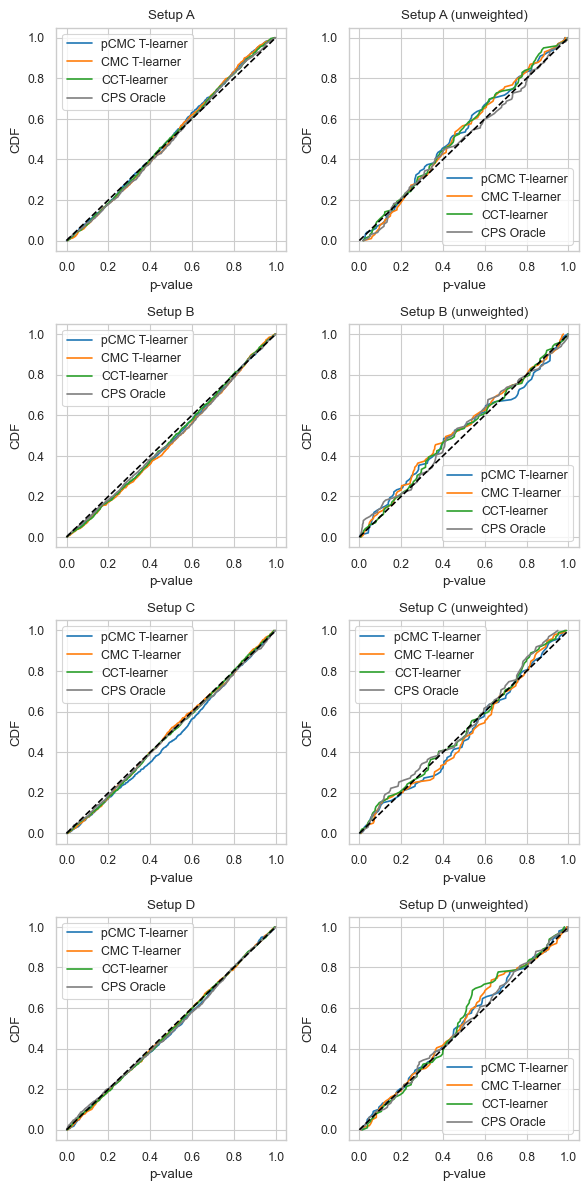

In [69]:
fig, axs = plt.subplots(4, 2, figsize=(6, 12))

setup_names = ["A", "B", "C", "D"]
for i, df in enumerate([df_setupA_p_values, df_setupB_p_values, df_setupC_p_values, df_setupD_p_values]):
    axs[i, 0].plot(df["pseudo_MC_T"].sort_values(), np.linspace(0, 1, len(df["pseudo_MC_T"])), label="pCMC T-learner",
                   color=sns.color_palette("tab10")[0])
    axs[i, 0].plot(df["MC_T"].sort_values(), np.linspace(0, 1, len(df["MC_T"])), label="CMC T-learner",
                   color=sns.color_palette("tab10")[1])
    axs[i, 0].plot(df["CT"].sort_values(), np.linspace(0, 1, len(df["CT"])), label="CCT-learner",
                   color=sns.color_palette("tab10")[2])
    axs[i, 0].plot(df["oracle"].sort_values(), np.linspace(0, 1, len(df["oracle"])), label="CPS Oracle",
                   color=sns.color_palette("tab10")[7])
    axs[i, 0].plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--', color='black')
    axs[i, 0].set_title(f"Setup {setup_names[i]}")
    axs[i, 0].set_xlabel("p-value")
    axs[i, 0].set_ylabel("CDF")
    axs[i, 0].legend()



for i, df in enumerate([df_setupA_unweighted_p_values, df_setupB_unweighted_p_values, df_setupC_unweighted_p_values, df_setupD_unweighted_p_values]):
    axs[i, 1].plot(df["pseudo_MC_T"].sort_values(), np.linspace(0, 1, len(df["pseudo_MC_T"])), label="pCMC T-learner",
                   color=sns.color_palette("tab10")[0])
    axs[i, 1].plot(df["MC_T"].sort_values(), np.linspace(0, 1, len(df["MC_T"])), label="CMC T-learner",
                   color=sns.color_palette("tab10")[1])
    axs[i, 1].plot(df["CT"].sort_values(), np.linspace(0, 1, len(df["CT"])), label="CCT-learner",
                   color=sns.color_palette("tab10")[2])
    axs[i, 1].plot(df["oracle"].sort_values(), np.linspace(0, 1, len(df["oracle"])), label="CPS Oracle",
                   color=sns.color_palette("tab10")[7])
    axs[i, 1].plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--', color='black')
    axs[i, 1].set_title(f"Setup {setup_names[i]} (unweighted)")
    axs[i, 1].set_xlabel("p-value")
    axs[i, 1].set_ylabel("CDF")
    axs[i, 1].legend()

plt.tight_layout()
plt.show()

In [79]:
df_setupA_p_values_hetero = pd.read_csv("../../results/outputs/nie_wager/setupA/p_values/simulations_A_RF_normalized_max_min_y_heteroscedastic_p_values.csv")
df_setupB_p_values = pd.read_csv("../../results/outputs/nie_wager/setupB/p_values/simulations_B_RF_normalized_max_min_y_heteroscedastic_p_values.csv")
df_setupC_p_values = pd.read_csv("../../results/outputs/nie_wager/setupC/p_values/simulations_C_RF_normalized_max_min_y_heteroscedastic_p_values.csv")
df_setupD_p_values = pd.read_csv("../../results/outputs/nie_wager/setupD/p_values/simulations_D_RF_normalized_max_min_y_heteroscedastic_p_values.csv")

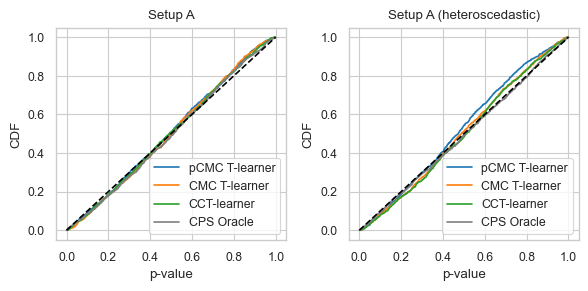

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

for i, df in enumerate([df_setupA_p_values, df_setupA_p_values_hetero]):
    axs[i].plot(df["pseudo_MC_T"].sort_values(), np.linspace(0, 1, len(df["pseudo_MC_T"])), label="pCMC T-learner",
                   color=sns.color_palette("tab10")[0])
    axs[i].plot(df["MC_T"].sort_values(), np.linspace(0, 1, len(df["MC_T"])), label="CMC T-learner",
                   color=sns.color_palette("tab10")[1])
    axs[i].plot(df["CT"].sort_values(), np.linspace(0, 1, len(df["CT"])), label="CCT-learner",
                   color=sns.color_palette("tab10")[2])
    axs[i].plot(df["oracle"].sort_values(), np.linspace(0, 1, len(df["oracle"])), label="CPS Oracle",
                   color=sns.color_palette("tab10")[7])
    axs[i].plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--', color='black')
    if i == 0:
        axs[i].set_title(f"Setup A")
    else:
        axs[i].set_title(f"Setup A (heteroscedastic)")
    axs[i].set_xlabel("p-value")
    axs[i].set_ylabel("CDF")
    axs[i].legend()
plt.tight_layout()
plt.show()

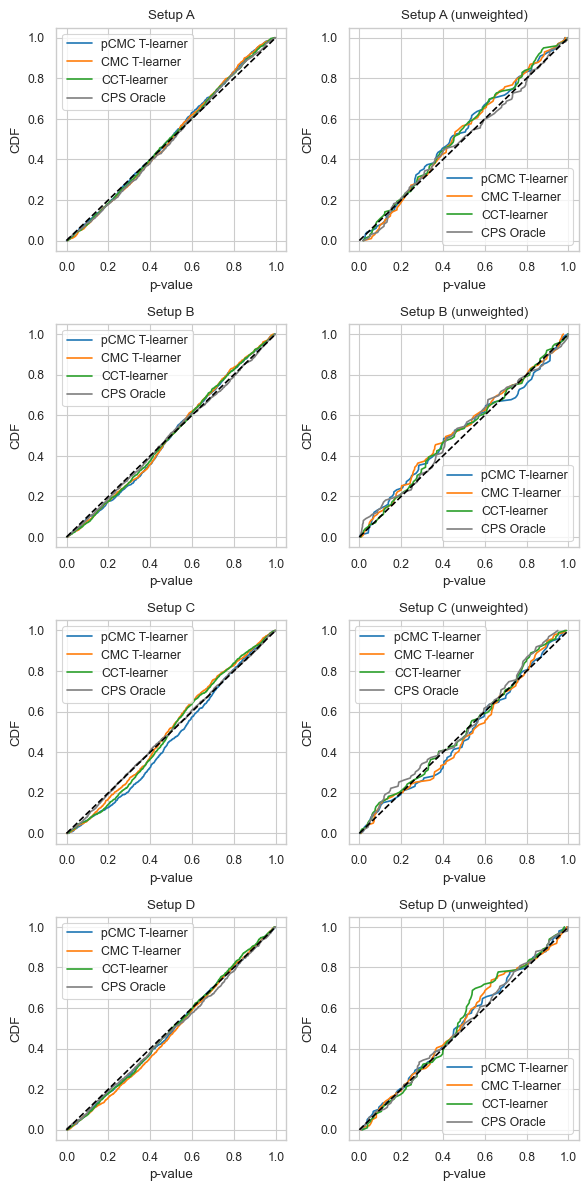

In [80]:
fig, axs = plt.subplots(4, 2, figsize=(6, 12))

setup_names = ["A", "B", "C", "D"]
for i, df in enumerate([df_setupA_p_values, df_setupB_p_values, df_setupC_p_values, df_setupD_p_values]):
    axs[i, 0].plot(df["pseudo_MC_T"].sort_values(), np.linspace(0, 1, len(df["pseudo_MC_T"])), label="pCMC T-learner",
                   color=sns.color_palette("tab10")[0])
    axs[i, 0].plot(df["MC_T"].sort_values(), np.linspace(0, 1, len(df["MC_T"])), label="CMC T-learner",
                   color=sns.color_palette("tab10")[1])
    axs[i, 0].plot(df["CT"].sort_values(), np.linspace(0, 1, len(df["CT"])), label="CCT-learner",
                   color=sns.color_palette("tab10")[2])
    axs[i, 0].plot(df["oracle"].sort_values(), np.linspace(0, 1, len(df["oracle"])), label="CPS Oracle",
                   color=sns.color_palette("tab10")[7])
    axs[i, 0].plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--', color='black')
    axs[i, 0].set_title(f"Setup {setup_names[i]}")
    axs[i, 0].set_xlabel("p-value")
    axs[i, 0].set_ylabel("CDF")
    axs[i, 0].legend()



for i, df in enumerate([df_setupA_unweighted_p_values, df_setupB_unweighted_p_values, df_setupC_unweighted_p_values, df_setupD_unweighted_p_values]):
    axs[i, 1].plot(df["pseudo_MC_T"].sort_values(), np.linspace(0, 1, len(df["pseudo_MC_T"])), label="pCMC T-learner",
                   color=sns.color_palette("tab10")[0])
    axs[i, 1].plot(df["MC_T"].sort_values(), np.linspace(0, 1, len(df["MC_T"])), label="CMC T-learner",
                   color=sns.color_palette("tab10")[1])
    axs[i, 1].plot(df["CT"].sort_values(), np.linspace(0, 1, len(df["CT"])), label="CCT-learner",
                   color=sns.color_palette("tab10")[2])
    axs[i, 1].plot(df["oracle"].sort_values(), np.linspace(0, 1, len(df["oracle"])), label="CPS Oracle",
                   color=sns.color_palette("tab10")[7])
    axs[i, 1].plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--', color='black')
    axs[i, 1].set_title(f"Setup {setup_names[i]} (unweighted)")
    axs[i, 1].set_xlabel("p-value")
    axs[i, 1].set_ylabel("CDF")
    axs[i, 1].legend()

plt.tight_layout()
plt.show()

### Effect of changing relation in epsilons

In [25]:
epsilons = np.concatenate([np.arange(-1, 0, 0.1), np.arange(0, 1.1, 0.1)])

In [26]:
csv_files_setupA = glob.glob("../../results/outputs/nie_wager/setupA/eval_epsilon/*.csv")
csv_files_setupB = glob.glob("../../results/outputs/nie_wager/setupB/eval_epsilon/*.csv")
csv_files_setupC = glob.glob("../../results/outputs/nie_wager/setupC/eval_epsilon/*.csv")
csv_files_setupD = glob.glob("../../results/outputs/nie_wager/setupD/eval_epsilon/*.csv")

data = []

for filepath in csv_files_setupA:
    df1 = pd.read_csv(filepath)
    df1["epsilon"] = epsilons
    df1.to_csv(filepath)

for filepath in csv_files_setupB:
    df1 = pd.read_csv(filepath)
    df1["epsilon"] = epsilons
    df1.to_csv(filepath)

for filepath in csv_files_setupC:
    df1 = pd.read_csv(filepath)
    df1["epsilon"] = epsilons
    df1.to_csv(filepath)

for filepath in csv_files_setupD:
    df1 = pd.read_csv(filepath)
    df1["epsilon"] = epsilons
    df1.to_csv(filepath)

In [27]:
csv_files_setupA = glob.glob("../../results/outputs/nie_wager/setupA/eval_epsilon/*.csv")
csv_files_setupB = glob.glob("../../results/outputs/nie_wager/setupB/eval_epsilon/*.csv")
csv_files_setupC = glob.glob("../../results/outputs/nie_wager/setupC/eval_epsilon/*.csv")
csv_files_setupD = glob.glob("../../results/outputs/nie_wager/setupD/eval_epsilon/*.csv")

data = []

for filepath in csv_files_setupA:
    df1 = pd.read_csv(filepath)
    df1['setup'] = 'A'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_A = pd.concat(data, axis=0, ignore_index=True)

data = []

for filepath in csv_files_setupB:
    df1 = pd.read_csv(filepath)
    df1['setup'] = 'B'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_B = pd.concat(data, axis=0, ignore_index=True)

data = []

for filepath in csv_files_setupC:
    df1 = pd.read_csv(filepath)
    df1['setup'] = 'C'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_C = pd.concat(data)

data = []

for filepath in csv_files_setupD:
    df1 = pd.read_csv(filepath)
    df1['setup'] = 'D'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_D = pd.concat(data, axis=0, ignore_index=True)

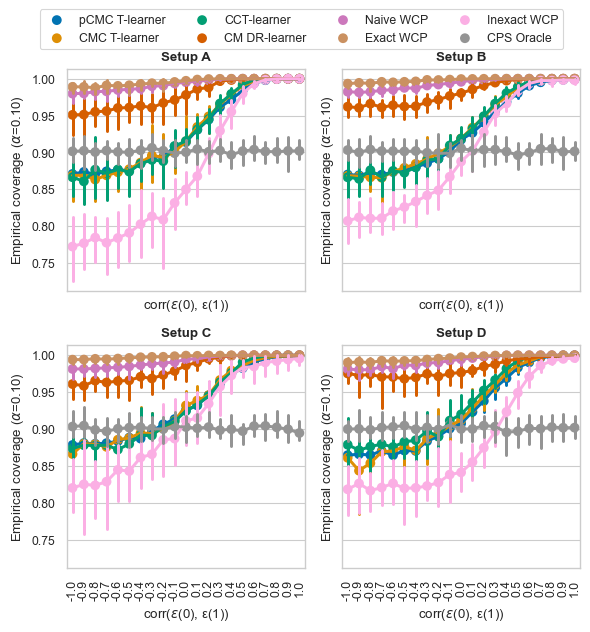

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True)

setup_names = ["A", "B", "C", "D"]
for i, df in enumerate([df_A, df_B, df_C, df_D]):
    setup_name = setup_names[i]
    sns.pointplot(x=df["epsilon"].round(2), y=df["coverage_pseudo_MC_T_ite"], ax=axs[i // 2, i % 2,], label="pCMC T-learner", errorbar="pi",
                  color=sns.color_palette()[0])
    sns.pointplot(x=df["epsilon"].round(2), y=df["coverage_MC_T_ite"], ax=axs[i // 2, i % 2,], label="CMC T-learner", errorbar="pi",
                  color=sns.color_palette()[1])
    sns.pointplot(x=df["epsilon"].round(2), y=df["coverage_CT_ite"], ax=axs[i // 2, i % 2,], label="CCT-learner", errorbar="pi",
                  color=sns.color_palette()[2])
    sns.pointplot(x=df["epsilon"].round(2), y=df["coverage_CM_ite"], ax=axs[i // 2, i % 2,], label="CM DR-learner", errorbar="pi",
                  color=sns.color_palette()[3])
    sns.pointplot(x=df["epsilon"].round(2), y=df["coverage_naive_ite"], ax=axs[i // 2, i % 2,], label="Naive WCP", errorbar="pi",
                  color=sns.color_palette()[4])
    sns.pointplot(x=df["epsilon"].round(2), y=df["coverage_exact_ite"], ax=axs[i // 2, i % 2,], label="Exact WCP", errorbar="pi",
                  color=sns.color_palette()[5])
    sns.pointplot(x=df["epsilon"].round(2), y=df["coverage_inexact_ite"], ax=axs[i // 2, i % 2,], label="Inexact WCP", errorbar="pi",
                  color=sns.color_palette()[6])
    sns.pointplot(x=df["epsilon"].round(2), y=df["coverage_ite_oracle"], ax=axs[i // 2, i % 2,], label="CPS Oracle", errorbar="pi",
                  color=sns.color_palette()[7])
    # axs[i // 2, i % 2,].hlines(0.9, 0, 20, linestyle='--', color='black', label="Nominal Coverage")


    axs[i // 2, i % 2,].set_ylabel(r"Empirical coverage ($\alpha$=0.10)")
    axs[i // 2, i % 2,].set_xlabel("corr($ε$(0), ε(1))")

    axs[i // 2, i % 2,].set_title(f"Setup {setup_name}", fontweight='semibold')

axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.legend(loc='lower center', ncol=4, bbox_to_anchor=(-0.17, 2.3))
fig.savefig("../../results/figures/nie_wager_coverage_epsilon.pdf", bbox_inches='tight')
fig.savefig("../../results/figures/nie_wager_coverage_epsilon.png", bbox_inches='tight')
plt.show()

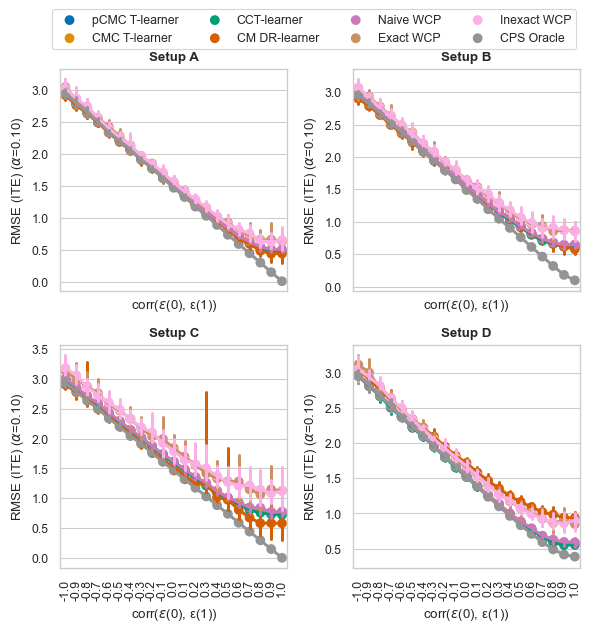

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=False)

setup_names = ["A", "B", "C", "D"]
for i, df in enumerate([df_A, df_B, df_C, df_D]):
    setup_name = setup_names[i]
    sns.pointplot(x=df["epsilon"].round(2), y=df["rmse_pseudo_MC_T_ite"], ax=axs[i // 2, i % 2,], label="pCMC T-learner", errorbar="pi",
                  color=sns.color_palette()[0])
    sns.pointplot(x=df["epsilon"].round(2), y=df["rmse_MC_T_ite"], ax=axs[i // 2, i % 2,], label="CMC T-learner", errorbar="pi",
                  color=sns.color_palette()[1])
    sns.pointplot(x=df["epsilon"].round(2), y=df["rmse_CT_ite"], ax=axs[i // 2, i % 2,], label="CCT-learner", errorbar="pi",
                  color=sns.color_palette()[2])
    sns.pointplot(x=df["epsilon"].round(2), y=df["rmse_CM_ite"], ax=axs[i // 2, i % 2,], label="CM DR-learner", errorbar="pi",
                  color=sns.color_palette()[3])
    sns.pointplot(x=df["epsilon"].round(2), y=df["rmse_naive_ite"], ax=axs[i // 2, i % 2,], label="Naive WCP", errorbar="pi",
                  color=sns.color_palette()[4])
    sns.pointplot(x=df["epsilon"].round(2), y=df["rmse_exact_ite"], ax=axs[i // 2, i % 2,], label="Exact WCP", errorbar="pi",
                  color=sns.color_palette()[5])
    sns.pointplot(x=df["epsilon"].round(2), y=df["rmse_inexact_ite"], ax=axs[i // 2, i % 2,], label="Inexact WCP", errorbar="pi",
                  color=sns.color_palette()[6])
    sns.pointplot(x=df["epsilon"].round(2), y=df["rmse_ite_oracle"], ax=axs[i // 2, i % 2,], label="CPS Oracle", errorbar="pi",
                  color=sns.color_palette()[7])

    axs[i // 2, i % 2].set_ylabel(r"RMSE (ITE) ($\alpha$=0.10)")
    axs[i // 2, i % 2].set_xlabel("corr($ε$(0), ε(1))")

    axs[i // 2, i % 2].set_title(f"Setup {setup_name}", fontweight='semibold')


axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
plt.tight_layout()

plt.legend(loc='lower center', ncol=4, bbox_to_anchor=(-0.17, 2.3))
fig.savefig("../../results/figures/nie_wager_rmse_epsilon.pdf", bbox_inches='tight')
fig.savefig("../../results/figures/nie_wager_rmse_epsilon.png", bbox_inches='tight')
plt.show()

/opt/anaconda3/envs/uq/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/anaconda3/envs/uq/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/anaconda3/envs/uq/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/anaconda3/envs/uq/lib/python3.10/site-packages/numpy/lib/function_base.py:4658: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5,
/opt/anaconda3/envs/uq/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


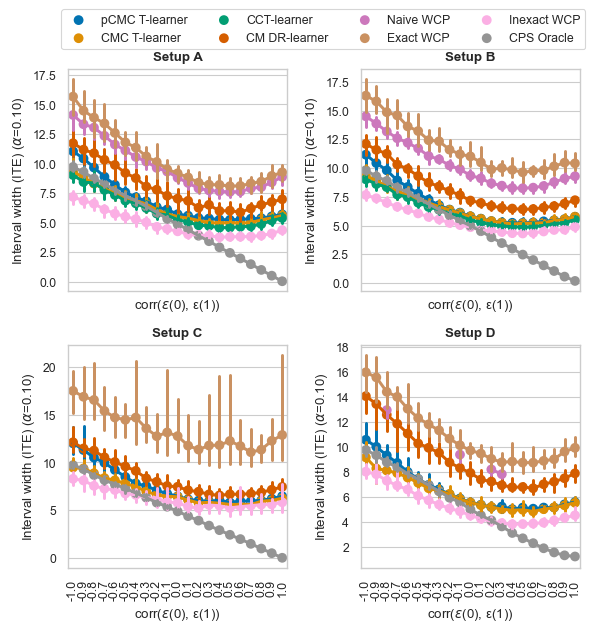

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=False)

setup_names = ["A", "B", "C", "D"]
for i, df in enumerate([df_A, df_B, df_C, df_D]):
    setup_name = setup_names[i]
    sns.pointplot(x=df["epsilon"].round(2), y=df["int_width_pseudo_MC_T"], ax=axs[i // 2, i % 2,], label="pCMC T-learner", errorbar="pi",
                  color=sns.color_palette()[0])
    sns.pointplot(x=df["epsilon"].round(2), y=df["int_width_MC_T"], ax=axs[i // 2, i % 2,], label="CMC T-learner", errorbar="pi",
                  color=sns.color_palette()[1])
    sns.pointplot(x=df["epsilon"].round(2), y=df["int_width_CT"], ax=axs[i // 2, i % 2,], label="CCT-learner", errorbar="pi",
                  color=sns.color_palette()[2])
    sns.pointplot(x=df["epsilon"].round(2), y=df["int_width_CM"], ax=axs[i // 2, i % 2,], label="CM DR-learner", errorbar="pi",
                  color=sns.color_palette()[3])
    sns.pointplot(x=df["epsilon"].round(2), y=df["int_width_naive_ite"], ax=axs[i // 2, i % 2,], label="Naive WCP", errorbar="pi",
                  color=sns.color_palette()[4])
    sns.pointplot(x=df["epsilon"].round(2), y=df["int_width_exact_ite"], ax=axs[i // 2, i % 2,], label="Exact WCP", errorbar="pi",
                  color=sns.color_palette()[5])
    sns.pointplot(x=df["epsilon"].round(2), y=df["int_width_inexact_ite"], ax=axs[i // 2, i % 2,], label="Inexact WCP", errorbar="pi",
                  color=sns.color_palette()[6])
    sns.pointplot(x=df["epsilon"].round(2), y=df["int_width_ite_oracle"], ax=axs[i // 2, i % 2,], label="CPS Oracle", errorbar="pi",
                  color=sns.color_palette()[7])

    axs[i // 2, i % 2].set_ylabel(r"Interval width (ITE) ($\alpha$=0.10)")
    axs[i // 2, i % 2].set_xlabel("corr($ε$(0), ε(1))")

    axs[i // 2, i % 2].set_title(f"Setup {setup_name}", fontweight='semibold')


axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
plt.tight_layout()

plt.legend(loc='lower center', ncol=4, bbox_to_anchor=(-0.17, 2.3))
fig.savefig("../../results/figures/nie_wager_efficiency_epsilon.pdf", bbox_inches='tight')
fig.savefig("../../results/figures/nie_wager_efficiency_epsilon.png", bbox_inches='tight')
plt.show()